In [3]:
############################## Read Data ####################################

# Pandas is used for data manipulation
import pandas as pd
# upload data


# features = pd.read_excel('Alldata236_ordinal.xlsx')
features = pd.read_excel('Alldata236_AE.xlsx', sheet_name='4tempercolumn')
# features = pd.read_excel('Alldata236_mixed.xlsx', sheet_name='4tempercolumn-O8')
# features = pd.read_excel('Alldata236_mixed.xlsx', sheet_name='4tempercolumn-O13')
# features = pd.read_excel('Alldata236_mixed.xlsx', sheet_name='4tempercolumn-missing')




In [4]:
features

,alloy name,temper_type,Type,digit1,digit2,digit3,Si,Fe,Cu,Mn,...,Endu,RGC,RSCC,Extr,CW,Mach,RSW,Braz,GW,AW
0,7040,T74511,T,7,4,511,0.00,0.0,1.90,0.00,...,150.0,Fair,Very Good,Fair,Borderline,Very Good,Very Good,Borderline,Borderline,Borderline
1,7050,T7351X,T,7,3,510,0.00,0.0,2.30,0.00,...,150.0,Fair,Very Good,Fair,Borderline,Very Good,Very Good,Borderline,Borderline,Borderline
2,5383,H116,H,1,1,60,0.00,0.0,0.00,0.85,...,160.0,Excellent,Very Good,Fair,Fair,Borderline,Excellent,Borderline,Fair,Excellent
3,5059,H116,H,1,1,60,0.00,0.0,0.00,0.90,...,170.0,Excellent,Very Good,Very Good,Fair,Borderline,Excellent,Borderline,Fair,Excellent
4,5086,H116,H,1,1,60,0.00,0.0,0.00,0.45,...,125.0,Excellent,Excellent,Very Good,Very Good,Borderline,Excellent,Borderline,Fair,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,6111,T41,T,4,1,0,0.85,0.0,0.70,0.28,...,55.0,Excellent,Excellent,Excellent,Fair,Fair,Excellent,Excellent,Excellent,Excellent
232,2008,T4,T,4,0,0,0.65,0.0,0.90,0.00,...,105.0,Fair,Fair,Very Good,Fair,Very Good,Very Good,Borderline,Borderline,Very Good
233,5056,O,O,0,0,0,0.00,0.0,0.00,0.12,...,140.0,Excellent,Very Good,Fair,Excellent,Borderline,Very Good,Borderline,Fair,Excellent
234,3003,O,O,0,0,0,0.00,0.0,0.12,1.20,...,50.0,Excellent,Excellent,Excellent,Excellent,Unacceptable,Very Good,Excellent,Excellent,Excellent


In [5]:
################ for Technological only

import numpy as np

features = features.replace('Borderline [3]', 'Borderline')
features = features.replace('Fair [3]', 'Fair')
features = features.replace('Excellent [3]', 'Excellent')
features = features.replace('Very Good [3]', 'Very Good')
features = features.replace('Unacceptable or Not Commericially Practical', 'Unacceptable')

#### categorical labels to 1-2-3-4
features = features.replace('Unacceptable or Not Commericially Practical', 1)
features = features.replace('Borderline', 2)
features = features.replace('Fair', 3)
features = features.replace('Very Good', 4)
features = features.replace('Excellent', 5)



In [6]:
########################### Defining label ##################################
import numpy as np

################ Mechanical properties ########################################

# ##Labels are the values we want to predict
# label1 = np.array(features['UTS'])
# label2 = np.array(features['TYS'])
# label3 = np.array(features['El'])
# label4 = np.array(features['BHN'])
# label5 = np.array(features['Shear'])
# label6 = np.array(features['Endu'])

####################### Technological Properties ###############################

#Labels are the values we want to predict
label1 = np.array(features['RGC'])
label2 = np.array(features['RSCC'])
label3 = np.array(features['CW'])
label4 = np.array(features['Mach'])
label5 = np.array(features['Braz'])
label6 = np.array(features['GW'])
label7 = np.array(features['AW'])
label8 = np.array(features['RSW'])
label9 = np.array(features['Extr'])

In [7]:
#### trimming features
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('UTS', axis = 1)
features= features.drop('TYS', axis = 1)
features= features.drop('El', axis = 1)
features= features.drop('BHN', axis = 1)
features= features.drop('Shear', axis = 1)
features= features.drop('Endu', axis = 1)

features= features.drop('alloy name', axis = 1)

features= features.drop('temper_type', axis = 1)
# features= features.drop('encoded_temper', axis = 1)

features= features.drop('RGC', axis = 1)
features= features.drop('RSCC', axis = 1)
features= features.drop('CW', axis = 1)
features= features.drop('Mach', axis = 1)
features= features.drop('Braz', axis = 1)
features= features.drop('GW', axis = 1)
features= features.drop('AW', axis = 1)
features= features.drop('RSW', axis = 1)
features= features.drop('Extr', axis = 1)

n_samples, n_features = features.shape
# One-hot encode categorical features
# features = pd.get_dummies(features,prefix='', prefix_sep='')
features = pd.get_dummies(features,prefix='', prefix_sep='')

# cols = list(features.columns.values) #Make a list of all of the columns in the df
# cols.pop(cols.index('H')) #Remove b from list
# cols.pop(cols.index('O')) #Remove x from list
# cols.pop(cols.index('T')) #Remove x from list
# features = features[['H', 'O','T']+cols]

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)
# n_samples, n_features = features.shape

In [8]:
features.shape

(236, 15)

In [23]:
################### 6- split test and train sets ###############################
from sklearn.model_selection import train_test_split
test_ratio = 0.002
SEED = 123
train_features1, test_features1, train_labels1, test_labels1 = train_test_split(features, label1,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features2, test_features2, train_labels2, test_labels2 = train_test_split(features, label2,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features3, test_features3, train_labels3, test_labels3 = train_test_split(features, label3,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features4, test_features4, train_labels4, test_labels4 = train_test_split(features, label4,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features5, test_features5, train_labels5, test_labels5 = train_test_split(features, label5,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features6, test_features6, train_labels6, test_labels6 = train_test_split(features, label6,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features7, test_features7, train_labels7, test_labels7 = train_test_split(features, label7,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features8, test_features8, train_labels8, test_labels8 = train_test_split(features, label8,
                                                                              test_size = test_ratio,
                                                                              random_state = SEED)
train_features9, test_features9, train_labels9, test_labels9 = train_test_split(features, label9,
                                                                              test_size = test_ratio,
                                                                              random_state = SEED)






In [24]:
##################  build RF Model ######################################
################################################################################
SEED = 100
######################## Regression: mechanical ################################
from sklearn.ensemble import RandomForestRegressor

# Model1 = RandomForestRegressor(random_state=SEED)
# Model2 = RandomForestRegressor(random_state=SEED)
# Model3 = RandomForestRegressor(random_state=SEED)
# Model4 = RandomForestRegressor(random_state=SEED)
# Model5 = RandomForestRegressor(random_state=SEED)
# Model6 = RandomForestRegressor(random_state=SEED)
# Model7 = RandomForestRegressor(random_state=SEED)

######################## Classification : technological ################################
from sklearn.ensemble import RandomForestClassifier

Model1 = RandomForestClassifier(random_state=SEED)
Model2 = RandomForestClassifier(random_state=SEED)
Model3 = RandomForestClassifier(random_state=SEED)
Model4 = RandomForestClassifier(random_state=SEED)
Model5 = RandomForestClassifier(random_state=SEED)
Model6 = RandomForestClassifier(random_state=SEED)
Model7 = RandomForestClassifier(random_state=SEED)
Model8 = RandomForestClassifier(random_state=SEED)
Model9 = RandomForestClassifier(random_state=SEED)


In [25]:
from IPython.core.pylabtools import figsize
##### feature importance Random Forest
import matplotlib.pyplot as plt
from matplotlib.pyplot import title

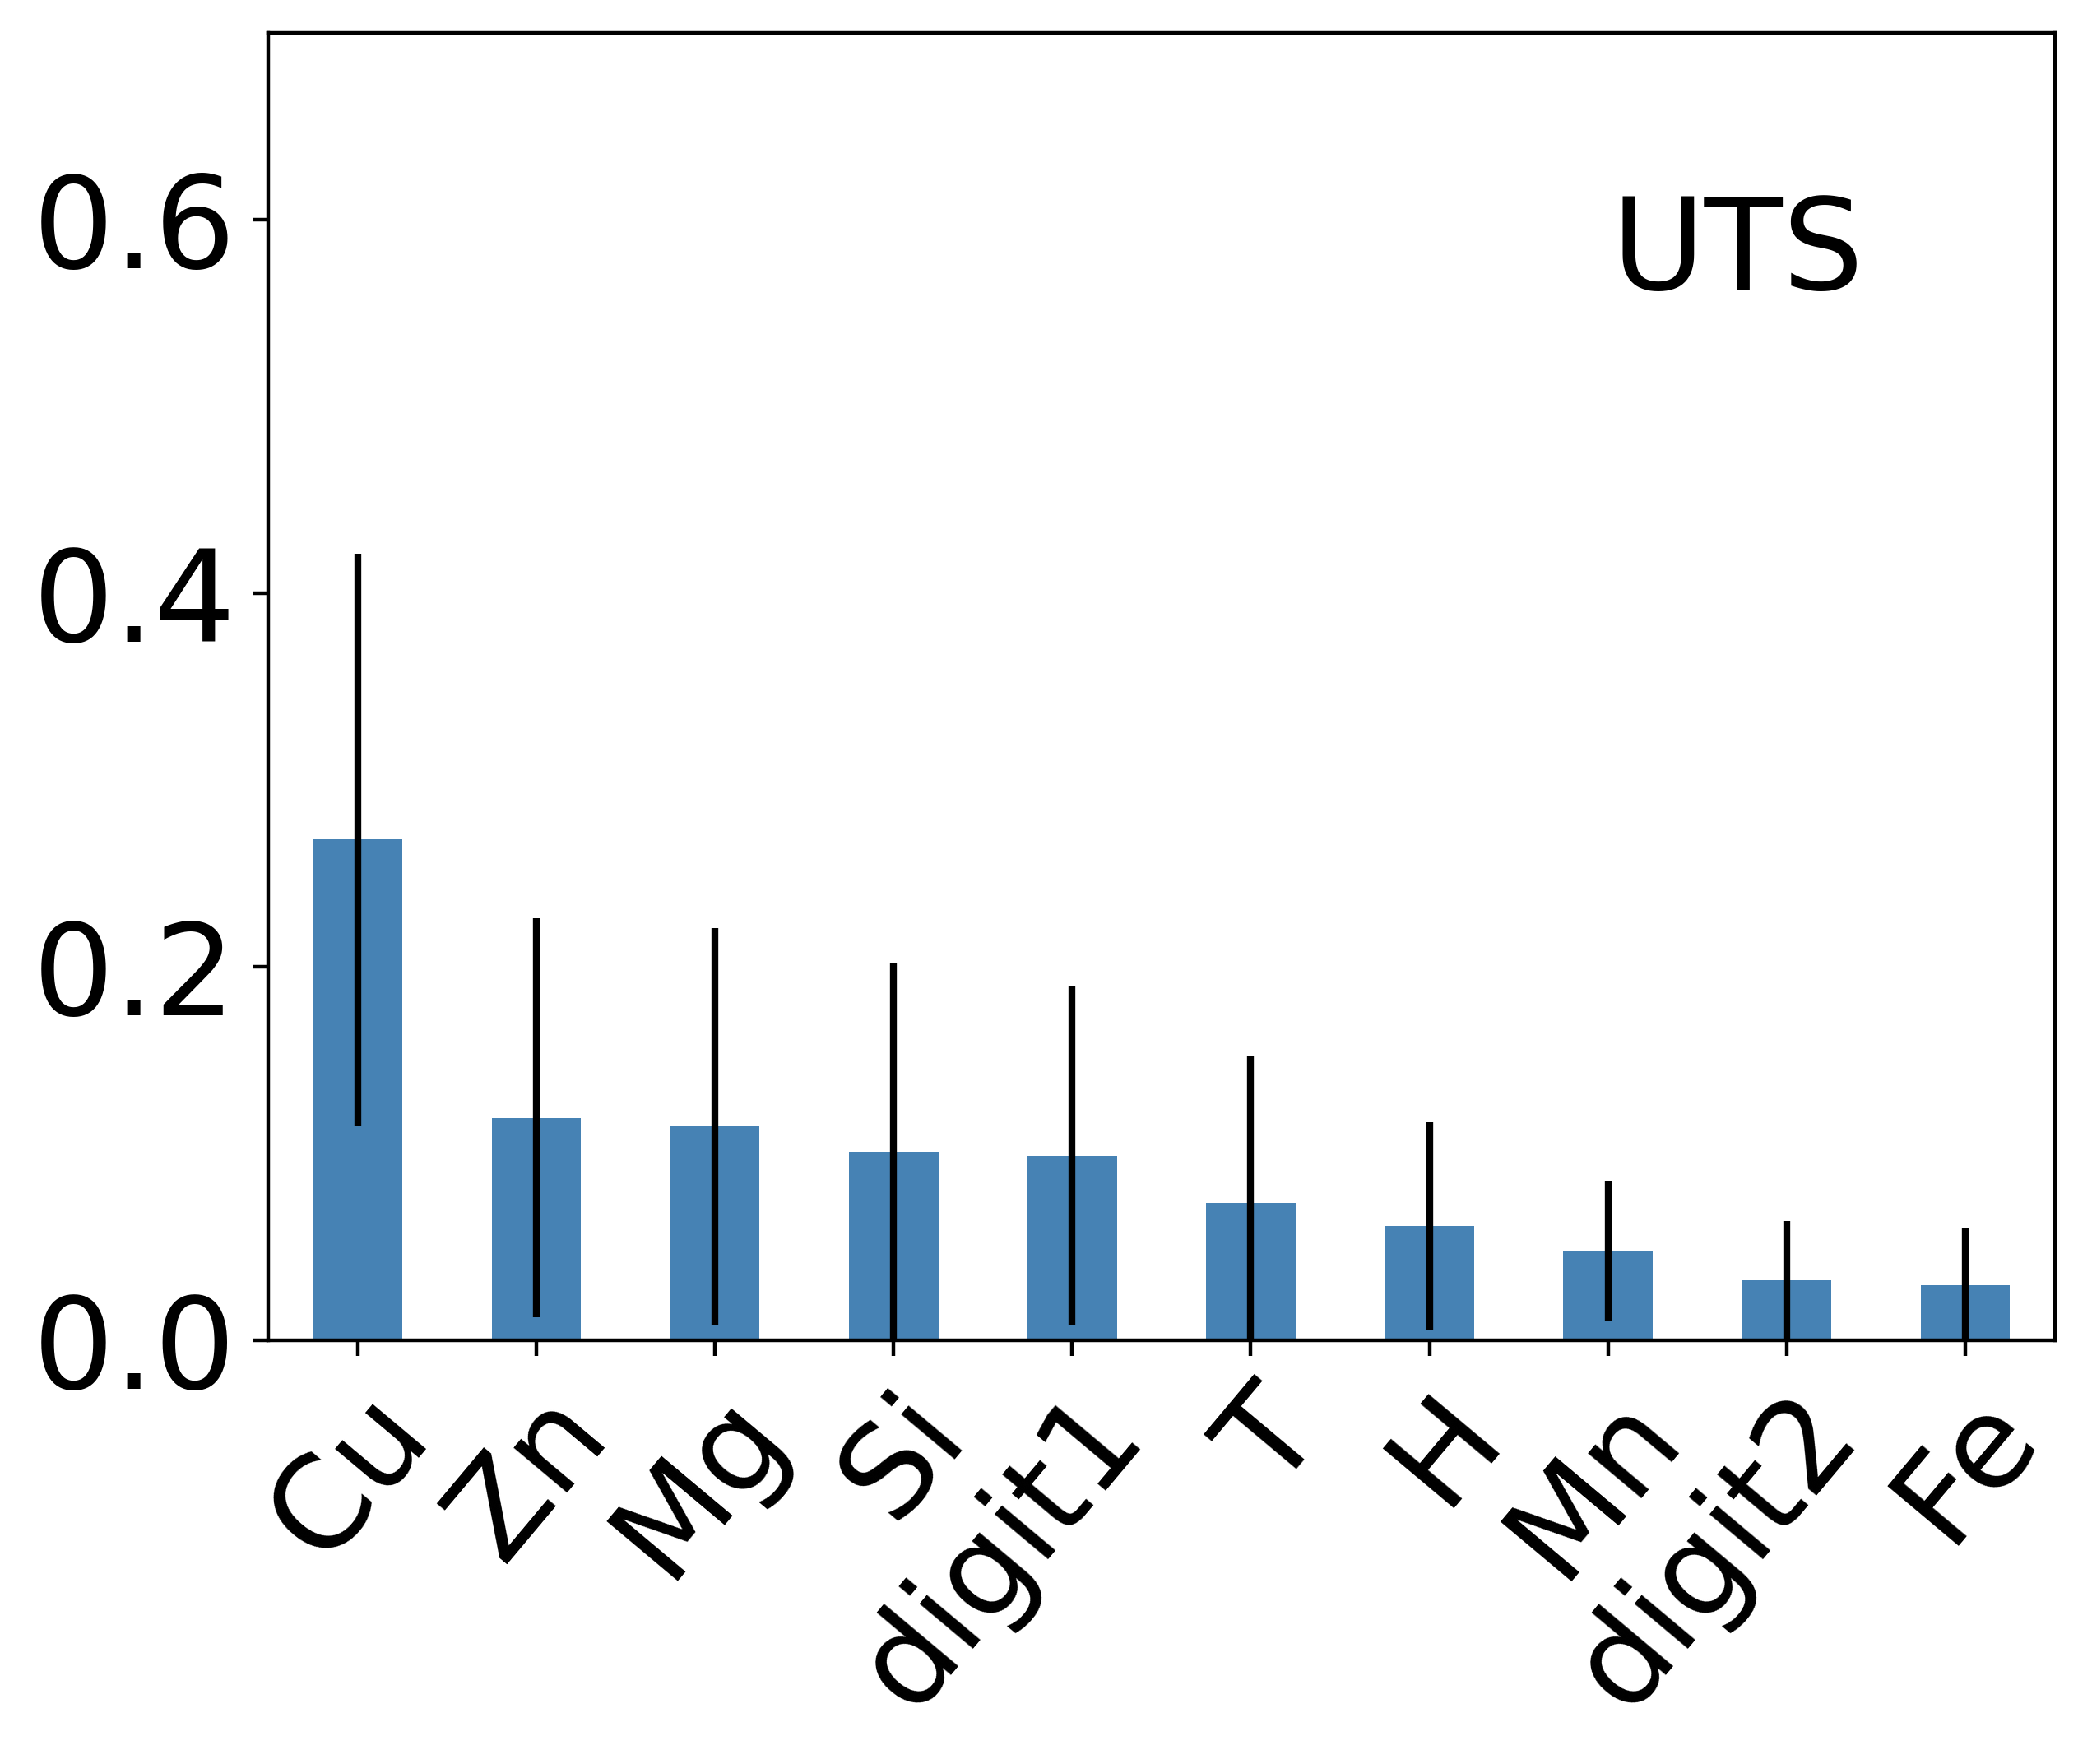

In [17]:
from IPython.core.pylabtools import figsize
##### feature importance Random Forest
import matplotlib.pyplot as plt
from matplotlib.pyplot import title


######## 1      UTS
model = Model1
train_features = pd.DataFrame(train_features1, columns=feature_list)
train_labels = train_labels1
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)


fig, ax = plt.subplots(figsize=(7,6), dpi=400)
# fig, ax = plt.subplots(figsize=(12,8))
# colors = ['steelblue','steelblue','darkred','steelblue','steelblue','darkred','steelblue','darkred','darkred','steelblue'] ### RGC
# colors = ['steelblue','darkred','steelblue','steelblue','steelblue','darkred','darkred','darkred','steelblue','steelblue'] ### UTS
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue']
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
# topfeatures.plot.bar(yerr = top_std ,ax=ax, color = 'blue')

# ax.set_ylabel('Feature importance')


fig.text(0.8, 0.8, 'UTS', color='black', ha='center')
# fig.text(0.8, 0.8, 'RGC', color='black', ha='center')

# fig.text(0.8, 0.8, 'UTS', color='black', ha='center',
#         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', pad=0.5)) # boxstyle='round,pad=1'

# fig.text(0.8, 0.8, 'RGC', color='black', ha='center',
#         bbox=dict(facecolor='none', edgecolor='black')) # boxstyle='round,pad=1'
plt.xticks(rotation=50, ha='right', rotation_mode='anchor')
plt.rcParams['font.size'] = '28'
# plt.rcParams['font.size'] = '37'
fig.tight_layout()

plt.ylim((0,0.7))

plt.show()


In [ ]:
# FI_score_1 = pd.DataFrame(feat_importances)

In [ ]:
# feat_list = pd.DataFrame(feature_list)
# feat_list.to_excel(r'/content/drive/My Drive/Yasaman_projects/Materials_Research/Experiments/Outputs/feat_list.xlsx', index = True)

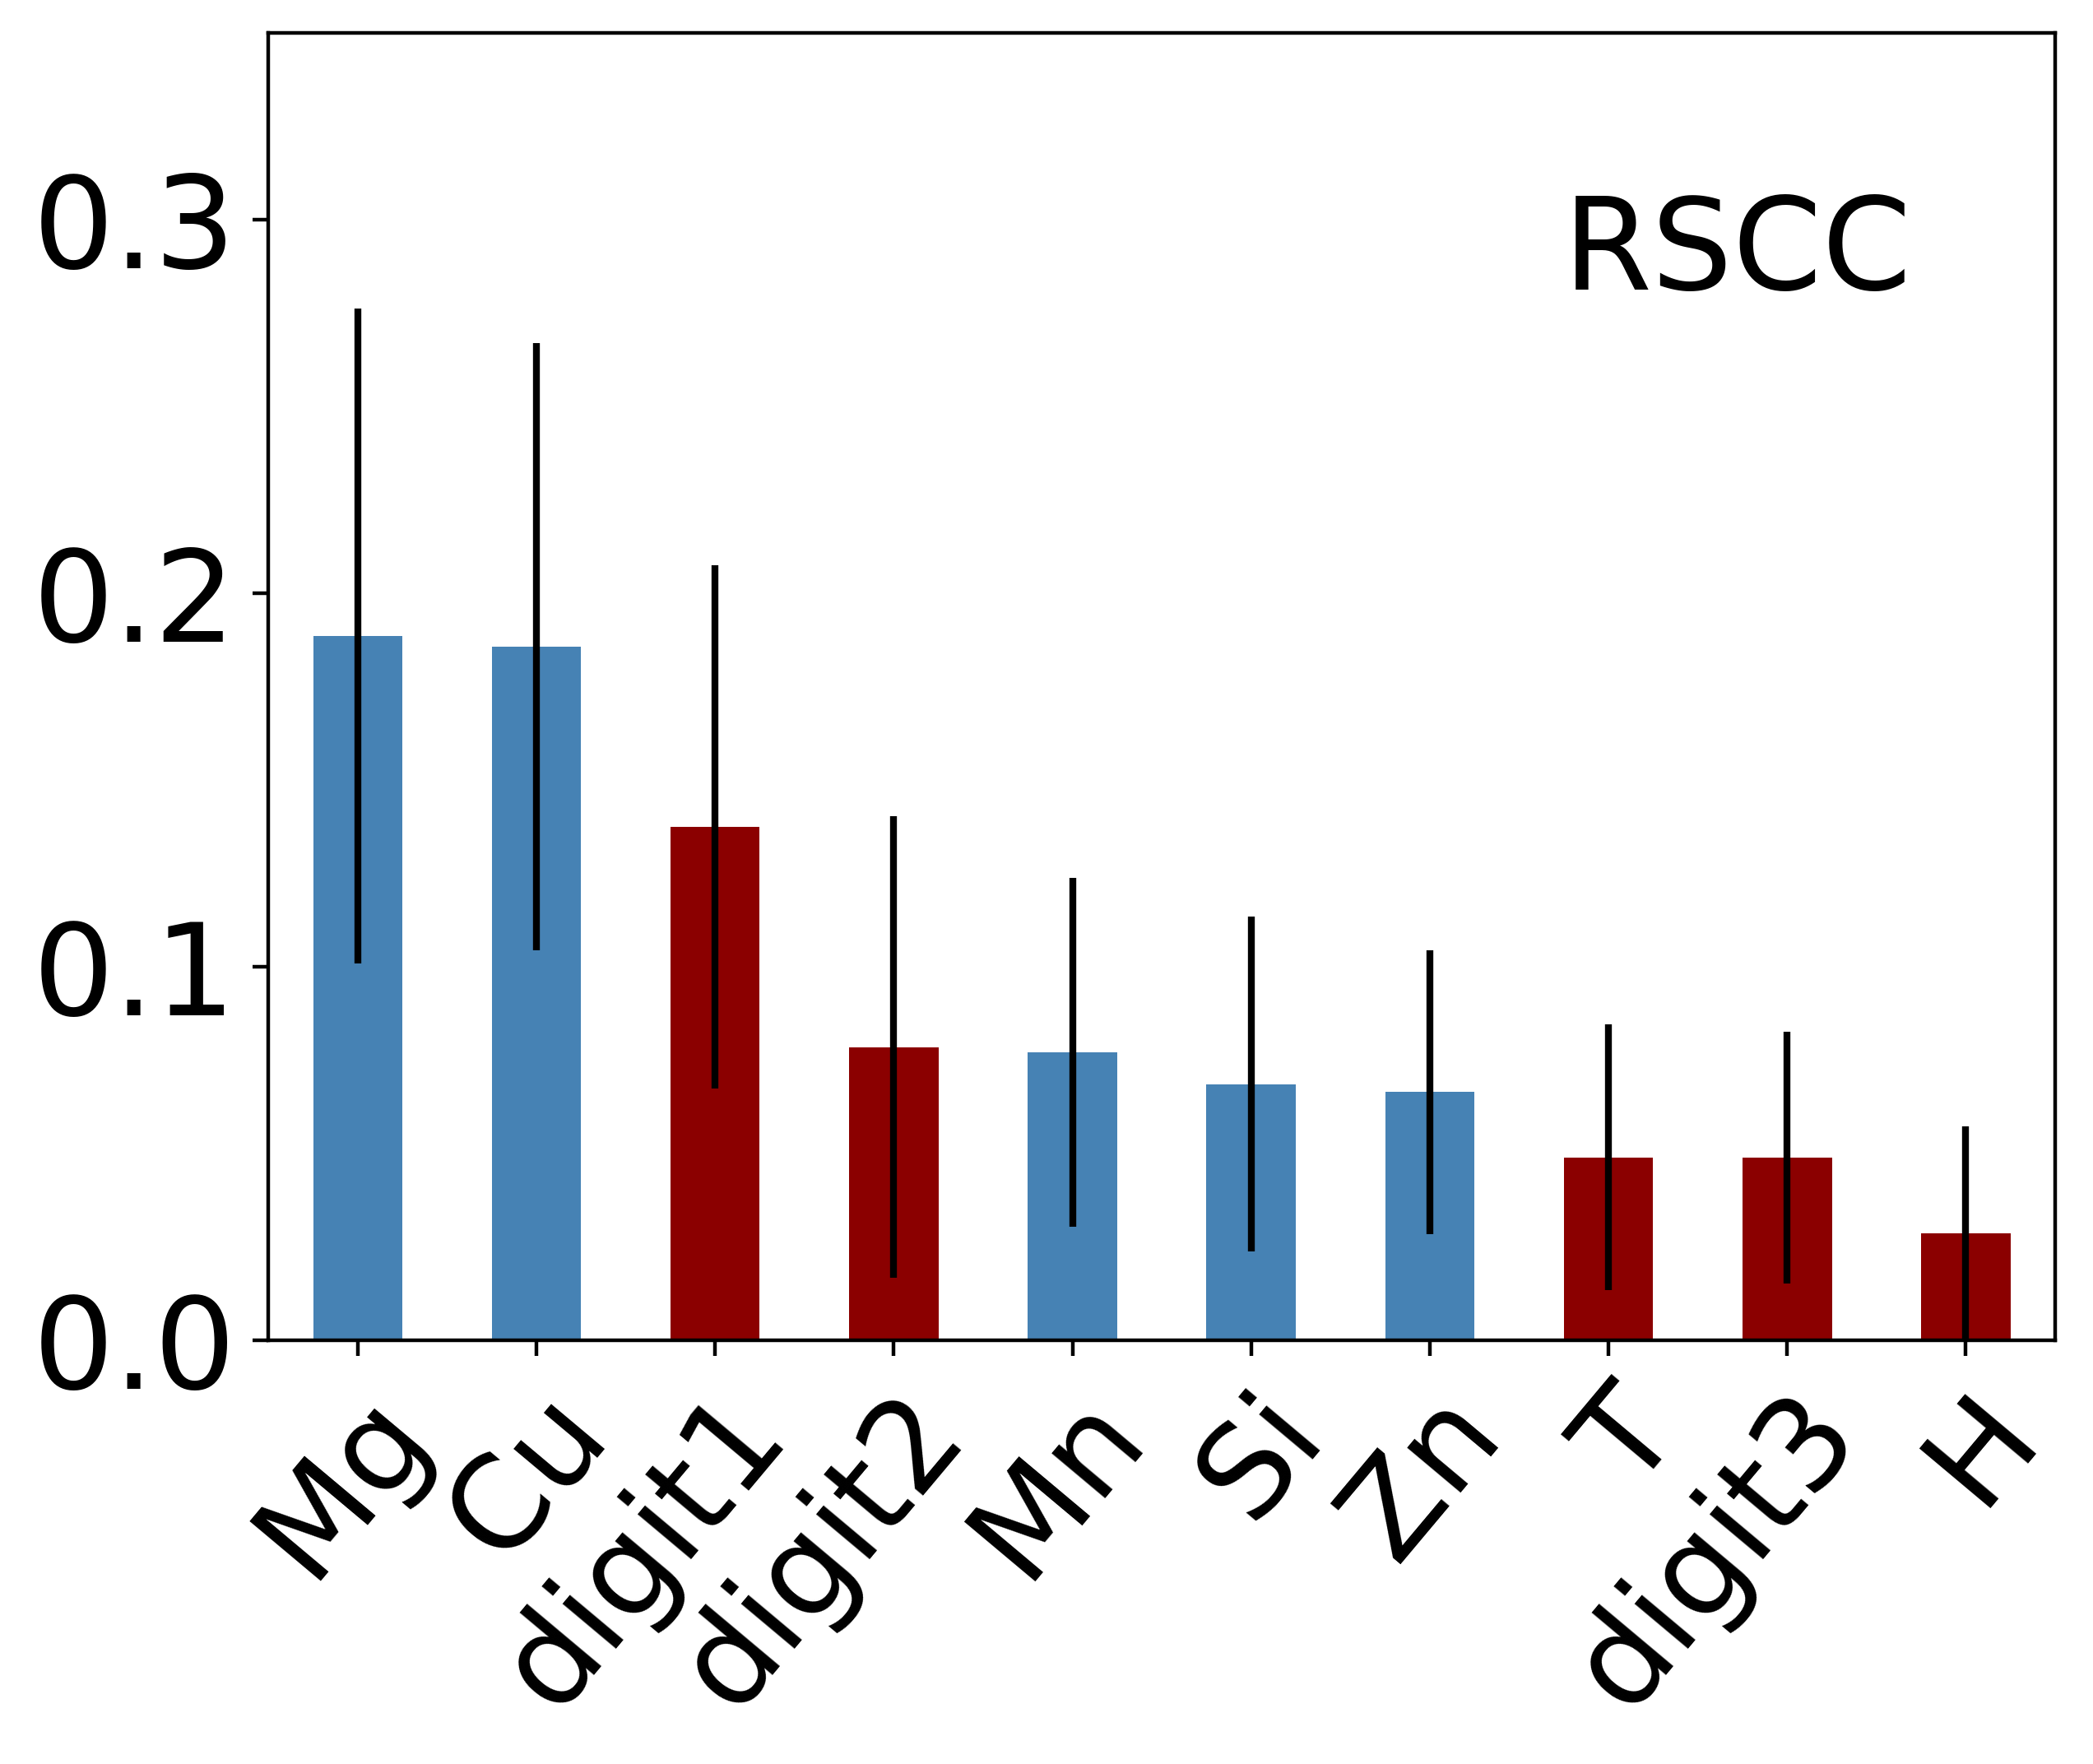

In [27]:
######### 2     TYS

model = Model2
train_features = pd.DataFrame(train_features2, columns=feature_list)
train_labels = train_labels2
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)

# fig, ax = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(7,6), dpi=400)
colors = ['steelblue','steelblue','darkred','darkred','steelblue','steelblue','steelblue','darkred','darkred','darkred'] ### RSCC-AE
# colors = ['darkred','steelblue','steelblue','steelblue','darkred','steelblue','steelblue','darkred','darkred','darkred'] ### TYS
# colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','darkred','darkred','darkred'] ### RSCC-OHE

topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
# topfeatures.plot.bar(yerr = top_std ,ax=ax, color = 'blue')

# ax.set_ylabel('Feature importance')

fig.tight_layout()

fig.text(0.8, 0.8, 'RSCC', color='black', ha='center') 

# fig.text(0.8, 0.8, 'TYS', color='black', ha='center') 

plt.xticks(rotation=50, ha='right', rotation_mode='anchor')
plt.rcParams['font.size'] = '28'
# plt.rcParams['font.size'] = '37'
fig.tight_layout()

plt.ylim((0,0.35))

plt.show()

In [ ]:
FI_score_2 = pd.DataFrame(feat_importances)

(0.0, 0.35)

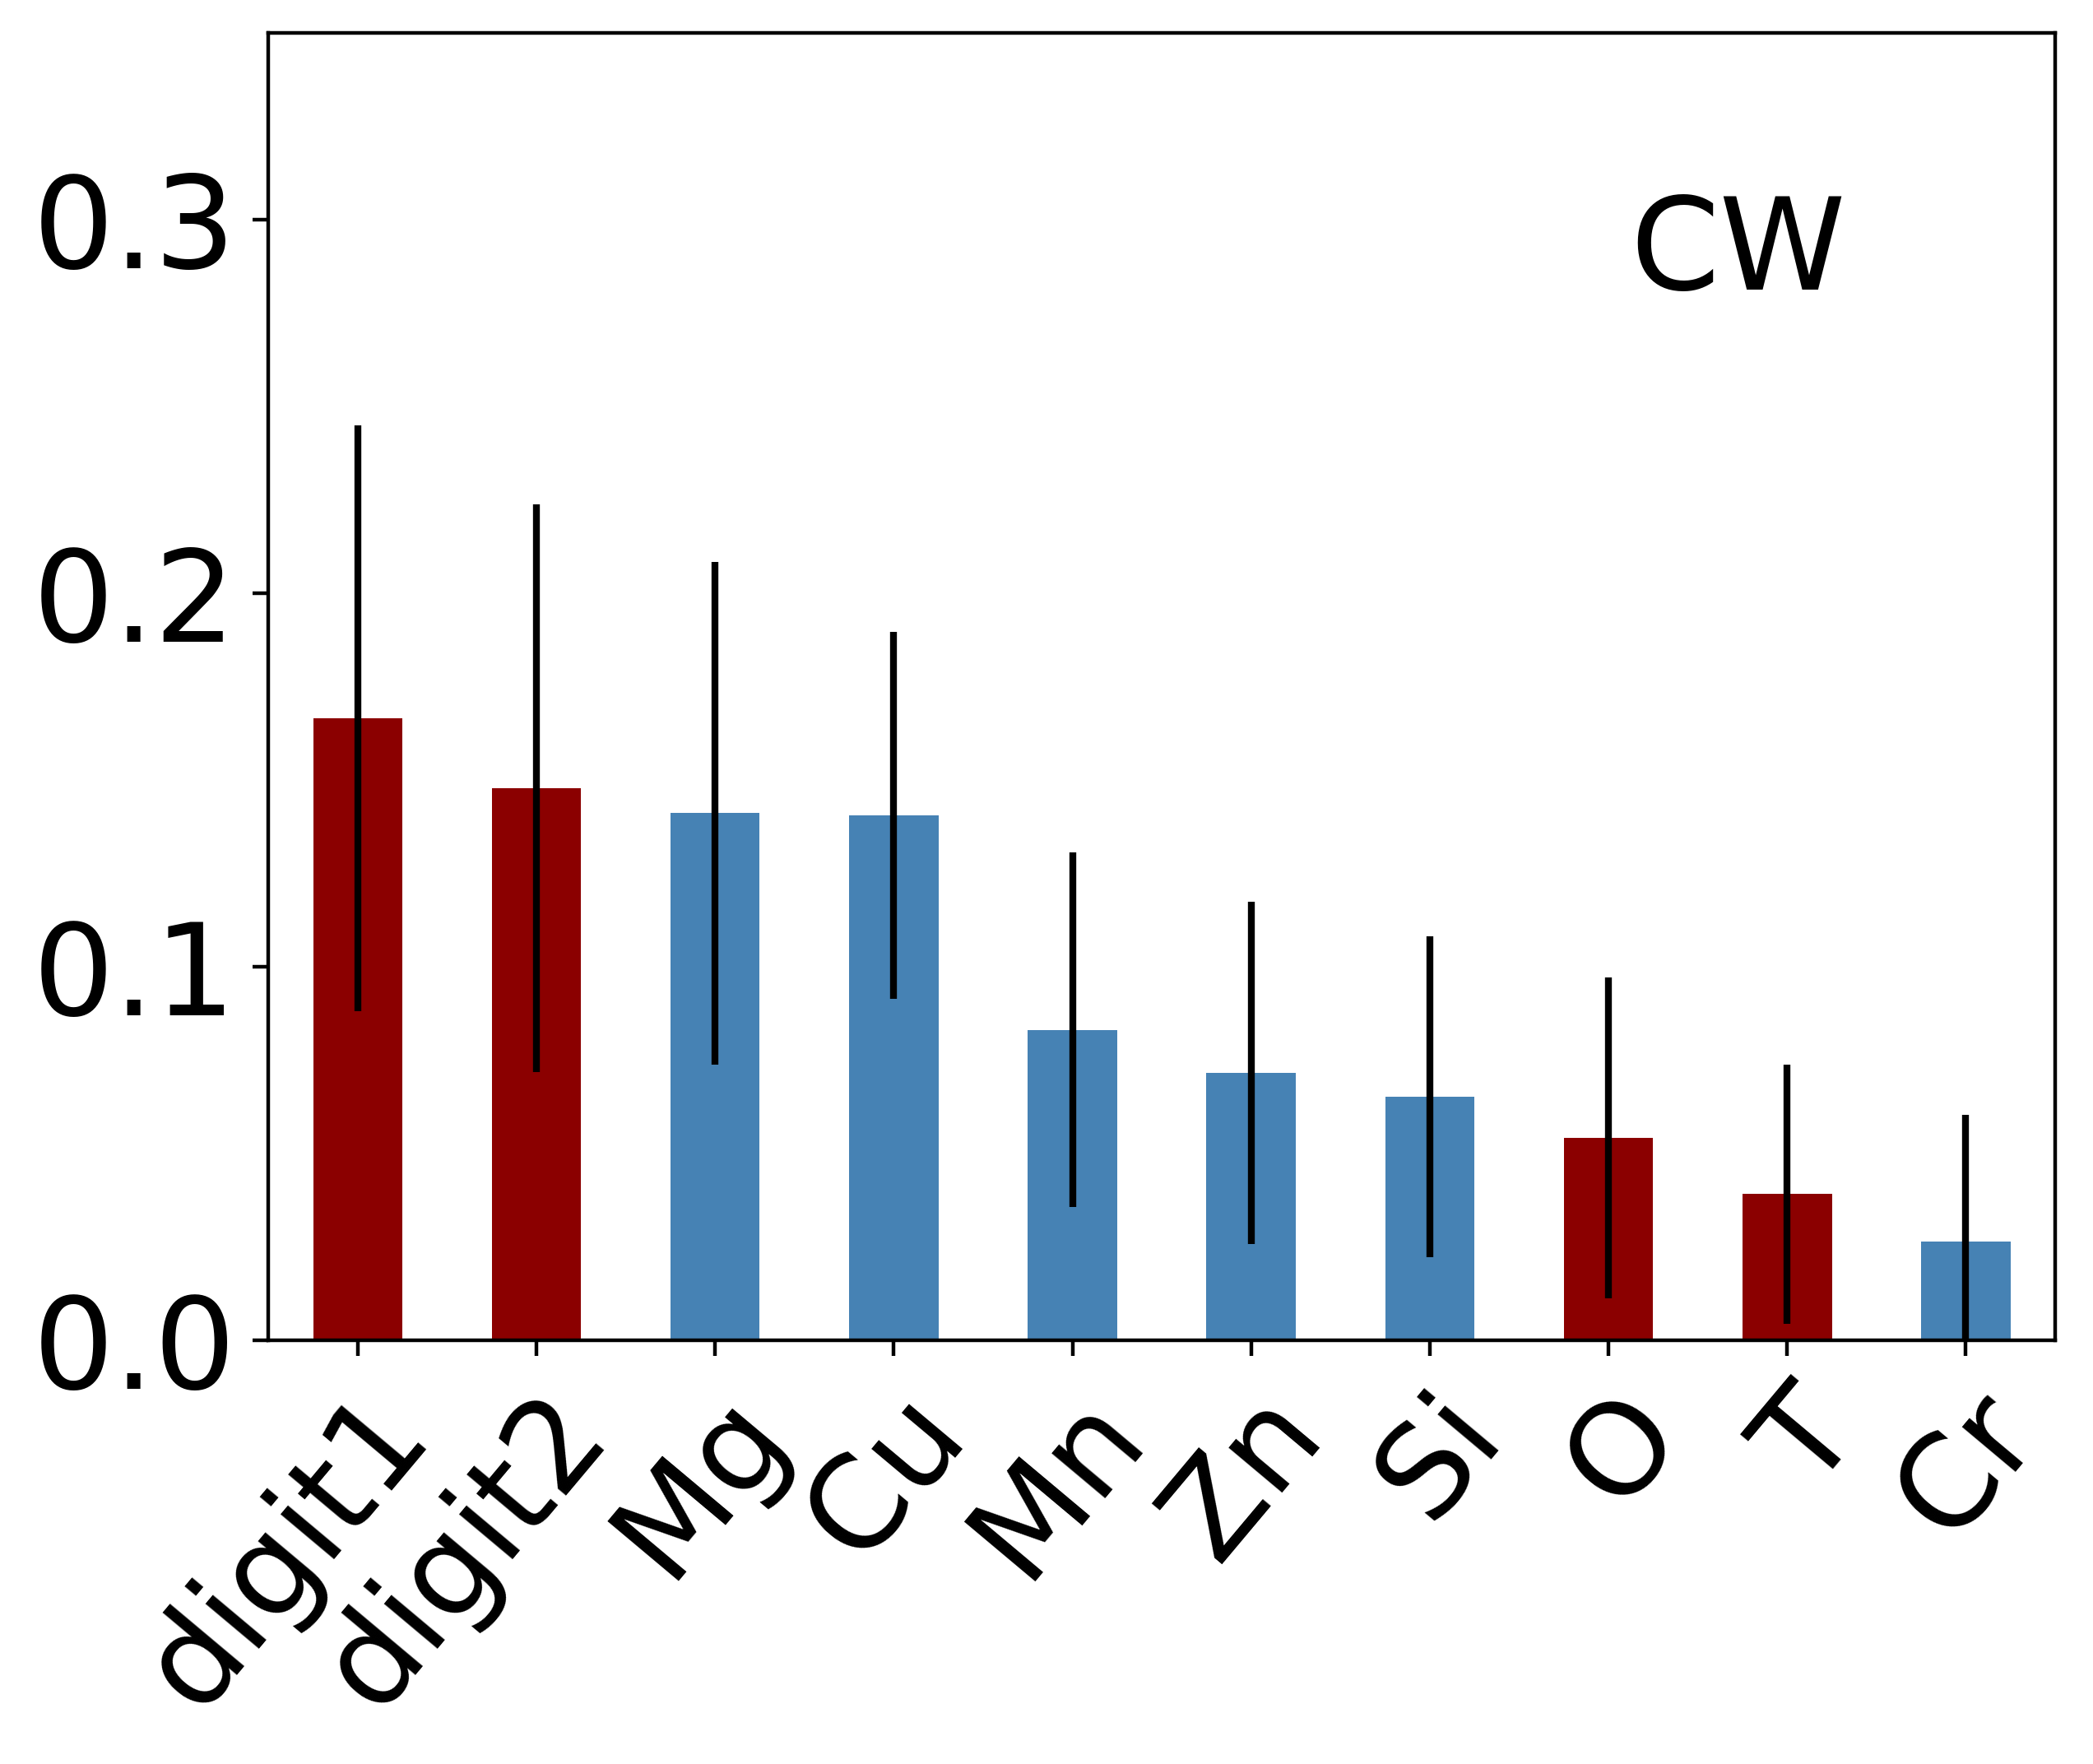

In [29]:
######### 3     Elong

model = Model3
train_features = pd.DataFrame(train_features3, columns=feature_list)
train_labels = train_labels3
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)


fig, ax = plt.subplots(figsize=(7,6), dpi=400)
colors = ['darkred','darkred','steelblue','steelblue','steelblue','steelblue','steelblue','darkred','darkred','steelblue'] ### CW-AE
# colors = ['darkred','darkred','darkred','steelblue','steelblue','steelblue','darkred','steelblue','steelblue','steelblue'] ### El
# colors = ['steelblue','steelblue','darkred','steelblue','steelblue','steelblue','steelblue','darkred','darkred','darkred']  ## CW-OHE

topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
# topfeatures.plot.bar(yerr = top_std ,ax=ax, color = 'blue')

# ax.set_ylabel('Feature importance')

fig.tight_layout()

# fig.text(0.8, 0.8, 'El', color='black', ha='center')
fig.text(0.8, 0.8, 'CW', color='black', ha='center') 



plt.xticks(rotation=50, ha='right', rotation_mode='anchor')
plt.rcParams['font.size'] = '28'
fig.tight_layout()

plt.ylim((0,0.35))

In [ ]:
FI_score_3 = pd.DataFrame(feat_importances)


In [ ]:
######### 4     BHN

model = Model4
train_features = pd.DataFrame(train_features4, columns=feature_list)
train_labels = train_labels4
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)

# colors = ['steelblue','darkred','steelblue','darkred','darkred','steelblue','steelblue','darkred','steelblue','steelblue'] ### Mach
colors = ['steelblue','darkred','steelblue','steelblue','darkred','darkred','steelblue','steelblue','darkred','darkred'] ### BHN
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue']



fig, ax = plt.subplots(figsize=(7,6), dpi=400)
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
# topfeatures.plot.bar(yerr = top_std ,ax=ax, color = 'blue')

# ax.set_ylabel('Feature importance')

fig.tight_layout()
#
fig.text(0.8, 0.8, 'BHN', color='black', ha='center') 
# fig.text(0.8, 0.8, 'Mach', color='black', ha='center') 

plt.xticks(rotation=50, ha='right', rotation_mode='anchor')
plt.rcParams['font.size'] = '28'
fig.tight_layout()

plt.ylim((0,0.7))

In [ ]:
FI_score_4 = pd.DataFrame(feat_importances)

In [ ]:
######### 5         Shear

model = Model5
train_features = pd.DataFrame(train_features5, columns=feature_list)
train_labels = train_labels5
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)

# colors = ['steelblue','steelblue','steelblue','steelblue','darkred','steelblue','darkred','steelblue','darkred','darkred'] ### Braz
colors = ['steelblue','steelblue','darkred','steelblue','darkred','steelblue','darkred','steelblue','darkred','steelblue'] ### Shear
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue']



fig, ax = plt.subplots(figsize=(7,6), dpi=400)
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
# topfeatures.plot.bar(yerr = top_std ,ax=ax, color = 'blue')
# ax.set_ylabel('Feature importance')

fig.tight_layout()



fig.text(0.8, 0.8, 'Shear', color='black', ha='center') 
# fig.text(0.8, 0.8, 'Braz', color='black', ha='center') 

plt.xticks(rotation=50, ha='right', rotation_mode='anchor')
plt.rcParams['font.size'] = '28'
fig.tight_layout()

plt.ylim((0,0.7))


In [ ]:
FI_score_5 = pd.DataFrame(feat_importances)

In [ ]:
######### 6            Endurance

model = Model6
train_features = pd.DataFrame(train_features6, columns=feature_list)
train_labels = train_labels6
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)


fig, ax = plt.subplots(figsize=(7,6), dpi=400)
topfeatures.plot.bar(yerr = top_std ,ax=ax)


# colors = ['steelblue','steelblue','steelblue','steelblue','darkred','darkred','steelblue','steelblue','darkred','darkred'] ### GW
colors = ['steelblue','steelblue','steelblue','darkred','steelblue','darkred','darkred','steelblue','darkred','steelblue'] ### Endu
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue']

topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
# topfeatures.plot.bar(yerr = top_std ,ax=ax, color = 'blue')
# ax.set_ylabel('Feature importance')
fig.tight_layout()

fig.text(0.8, 0.8, 'Endu', color='black', ha='center') 
# fig.text(0.8, 0.8, 'GW', color='black', ha='center') 

plt.xticks(rotation=50, ha='right', rotation_mode='anchor')
plt.rcParams['font.size'] = '28'
fig.tight_layout()

plt.ylim((0,0.7))



In [ ]:
FI_score_6 = pd.DataFrame(feat_importances)

In [ ]:

######### 7      Elastic Modulus

model = Model7
train_features = pd.DataFrame(train_features7, columns=feature_list)
train_labels = train_labels7
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)

colors = ['steelblue','darkred','steelblue','steelblue','steelblue','darkred','darkred','darkred','steelblue','darkred'] ### GW
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue']


fig, ax = plt.subplots(figsize=(7,6), dpi=400)

topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
# topfeatures.plot.bar(yerr = top_std ,ax=ax, color = 'blue')
# ax.set_ylabel('Feature importance')

fig.tight_layout()


fig.text(0.8, 0.8, 'AW', color='black', ha='center')

plt.xticks(rotation=50, ha='right', rotation_mode='anchor')
plt.rcParams['font.size'] = '28'
fig.tight_layout()

plt.ylim((0,0.7))



In [ ]:
FI_score_7 = pd.DataFrame(feat_importances)

In [ ]:

######### 8

model = Model8
train_features = pd.DataFrame(train_features8, columns=feature_list)
train_labels = train_labels8
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)


colors = ['steelblue','darkred','darkred','steelblue','steelblue','steelblue','darkred','darkred','steelblue','darkred'] ### GW


fig, ax = plt.subplots(figsize=(7,6), dpi=400)
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
# topfeatures.plot.bar(yerr = top_std ,ax=ax, color = 'blue')

# ax.set_ylabel('Feature importance')

fig.tight_layout()


fig.text(0.8, 0.8, 'RSW', color='black', ha='center') 


plt.xticks(rotation=50, ha='right', rotation_mode='anchor')
plt.rcParams['font.size'] = '28'
fig.tight_layout()

plt.ylim((0,0.7))



In [ ]:
FI_score_8 = pd.DataFrame(feat_importances)

In [ ]:

######### 9

model = Model9
train_features = pd.DataFrame(train_features9, columns=feature_list)
train_labels = train_labels9
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)


colors = ['steelblue','steelblue','steelblue','steelblue','darkred','steelblue','darkred','steelblue','darkred','darkred'] ### GW


fig, ax = plt.subplots(figsize=(7,6), dpi=400)
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
# topfeatures.plot.bar(yerr = top_std ,ax=ax, color = 'blue')

# ax.set_ylabel('Feature importance')
fig.tight_layout()


fig.text(0.8, 0.8, 'Extr', color='black', ha='center') 


plt.xticks(rotation=50, ha='right', rotation_mode='anchor')
plt.rcParams['font.size'] = '28'
fig.tight_layout()

plt.ylim((0,0.7))



In [ ]:
FI_score_9 = pd.DataFrame(feat_importances)

In [ ]:
Mech_scores = pd.concat([FI_score_1, FI_score_2, FI_score_3, FI_score_4, FI_score_5, FI_score_6], axis=1)

Mech_scores.to_excel(r'/content/drive/My Drive/Yasaman_projects/Materials_Research/Experiments/Outputs/Mech_scores.xlsx', index = True)

In [ ]:
tech_scores = pd.concat([FI_score_1, FI_score_2, FI_score_3, FI_score_4, FI_score_5, FI_score_6, FI_score_7, FI_score_8, FI_score_9], axis=1)

tech_scores.to_excel(r'/content/drive/My Drive/Yasaman_projects/Materials_Research/Experiments/Outputs/tech_scores.xlsx', index = True)